In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler
import torch

import matplotlib.pyplot as plt

from SIPR import SIPR


data_path = 'SIPR/index_data/'
res_path = 'SIPR/res/'


In [ ]:
def train_recognition_module(
    data, dataname=None,
    n_clusters=12,
    l_min=12, l_max=16,
    max_iters=100,
    init_strategy='kmeans++',
    barycenter='dba', gamma=0.5,
    plot_progress=True,
    plot_loss=True,
    store_res=True
    ):
  s
  # Run SIPR
  sipr = SIPR(n_clusters, l_min, l_max, gamma)
  sipr.fit(series=data, 
           max_iters=max_iters,
           init_strategy=init_strategy, 
           barycenter=barycenter,
           plot_progress=plot_progress,
           store_res=store_res, dataname=dataname)
  centroids = sipr.centroids
  labels = sipr.labels
  subsequences = sipr.subsequences
  segmentation = sipr.segmentation

  # Save results
  if store_res:
    df_centroids = pd.DataFrame(centroids)
    df_labels = pd.DataFrame(labels)
    df_subsequences = pd.DataFrame(subsequences)
    df_segmentation = pd.DataFrame(segmentation)
    dict_init = {'kmeans++': 'kmpp',
                 'random_sample': 'rs',
                 'random_noise': 'rn',
                 'reference':'ref'}
    filename = f"sipr_{dataname}_k{n_clusters}_l{l_min}-{l_max}_{barycenter[:4]}_{dict_init[init_strategy]}"
    df_centroids.to_csv(res_path + filename + '_centroids.csv')
    df_labels.to_csv(res_path + filename + '_labels.csv')
    df_subsequences.to_csv(res_path + filename + '_subsequences.csv')
    df_segmentation.to_csv(res_path + filename + '_segmentation.csv')
  
  # Plot training loss
  if plot_loss:
    hist_loss = np.array(sipr.hist_loss)
    plt.figure(figsize=(4,2))
    plt.plot(hist_loss, label='total_loss')
    plt.legend(loc='upper right')

  return centroids, labels, subsequences, segmentation



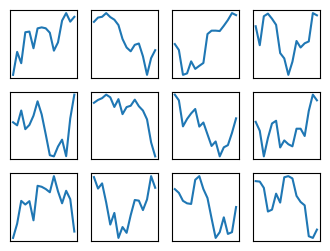

  0%|          | 0/100 [00:00<?, ?it/s]

-- Iter 1 --
Total Loss: 106.86643955002653


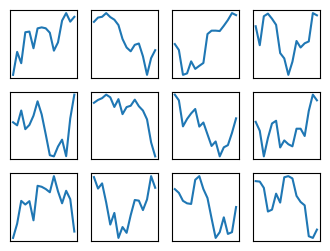

-- Iter 10 --
Total Loss: 97.14851595396078


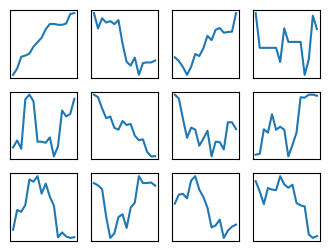

-- Iter 20 --
Total Loss: 102.75861150911115


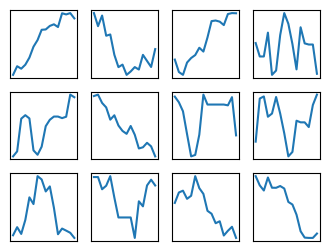

-- Iter 30 --
Total Loss: 98.02600109952073


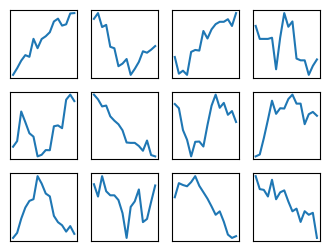

-- Iter 40 --
Total Loss: 99.34276355927388


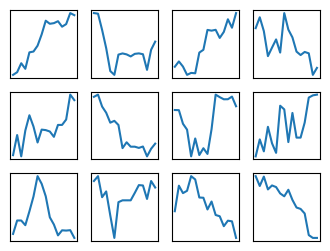

-- Iter 50 --
Total Loss: 96.58699494415491


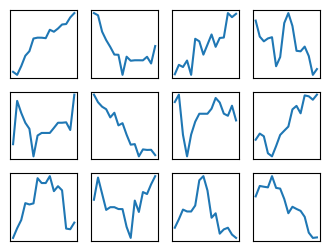

-- Iter 60 --
Total Loss: 99.02737489306867


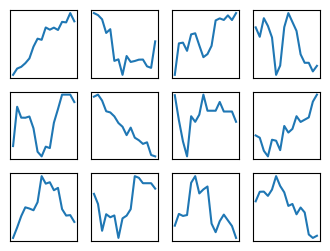

-- Iter 70 --
Total Loss: 94.7045215967861


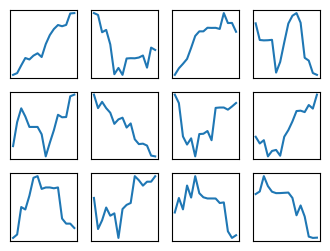

-- Iter 80 --
Total Loss: 97.00154890431388


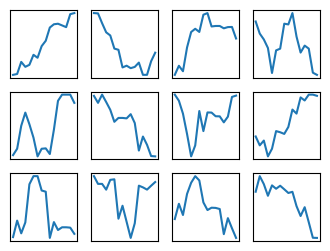

-- Iter 90 --
Total Loss: 96.74308062750256


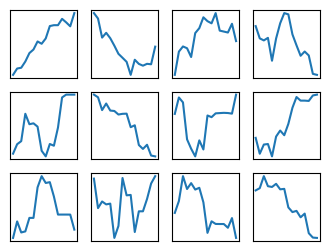

-- Iter 100 --
Total Loss: 94.91689445885261


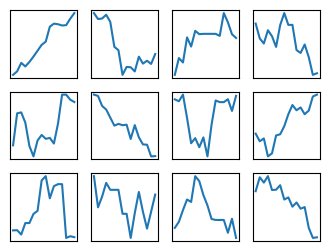

(array([[0.024779246788730884, 0.09117957213302323, 0.22866425184104713,
         0.17470548453523388, 0.2300123001795778, 0.37733645715285885,
         0.5000077352169302, 0.5194548359953047, 0.5035599625331202,
         0.6827994970183011, 0.6399939910363751, 0.7983082891367372,
         0.8720309240784982, 0.8489324244660692, 0.9897047818454743, 1.0],
        [0.8842656732743261, 0.9946032342671369, 0.9790734753219092,
         0.8550216766473165, 0.4353322932409524, 0.486880396073088,
         0.44857817991253757, 0.16407911271531472, 0.04143440578729482,
         0.0134775641025639, 0.16123762868876965, 0.3170982382708351,
         0.22481621143772182, 0.2632046316645546, 0.23413710789099512,
         0.33434090218851825],
        [0.025002403985211325, 0.24503859072926518, 0.2532817420606239,
         0.5426252262766422, 0.3935701312646309, 0.6891560540854975,
         0.6983176927937205, 0.6949325404309215, 0.6869241628672741,
         0.7022620545295152, 0.6772439258055063, 0.6

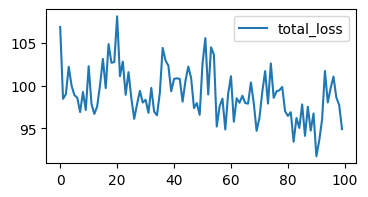

In [ ]:
hs_df = pd.read_csv('SIPR/index_data/hs300_index.csv',index_col=False)
df = hs_df['close'].values
train_recognition_module(df,dataname ='hs300')
